##### https://www.kaggle.com/code/darrylljk/analysis-netflix-reviews-with-nlp/input

#### DataSet ^

## 1. Definition of the Dataset

The dataset used in this project is a collection of Netflix reviews. It consists of 113,068 entries with the following columns:

#### reviewId: 
Unique identifier for each review.

#### userName:
Name of the user who posted the review.

#### content:
The text of the review.

#### score:
Rating given by the user, typically ranging from 1 to 5.

#### thumbsUpCount:
Number of likes the review received.

#### reviewCreatedVersion:
Version of the app at the time of review creation.

#### at:
Date and time when the review was posted.

#### appVersion:
Version of the app the user was using when they posted the review.

This dataset provides insights into user opinions and ratings for Netflix content.

In [1]:
import pandas as pd
import spacy
spacy.require_gpu()
import re
import torch
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud
from textblob import TextBlob
from transformers import BertTokenizer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
df = pd.read_csv('netflix_reviews.csv')

In [4]:
df.info

<bound method DataFrame.info of                                     reviewId            userName  \
0       efd00499-5e00-49b5-9f32-bc7177ac5ca6     Mikel Magnusson   
1       be0d97e1-7de1-4f07-b493-35a53098b5a4       John McDevitt   
2       8970dbcd-d75f-4016-bb93-efa5de3ef9e6      Mayur Savaliya   
3       a288bc3c-8a90-42d3-b585-1c8078faa96c  Magdalena Glessing   
4       c388a806-0795-4812-b04e-5b2cdf327157    Elizabeth Turner   
...                                      ...                 ...   
113063  a760ead9-e7aa-4ed1-a651-5c37c3600dac       A Google user   
113064  4957f9e7-d7f4-4a52-9764-031cebcac83f        Captain Jeoy   
113065  9acf7586-7abf-4b50-8c50-3ede3b2a42c4            Suryansh   
113066  32870f7f-c461-4256-b602-75244ca60248       A Google user   
113067  dc1352e9-10a8-41ca-ab23-05d045b08e90          suraj soni   

                                                  content  score  \
0       Netfix Canada forced my wife into a screen tha...      1   
1       I use t

In [5]:
df_c = df.iloc[:2000].copy()

The dataset used in this project is a collection of Netflix reviews. It consists of 113,068 entries with the following columns:

*   reviewId: Unique identifier for each review.
*   userName: Name of the user who posted the review.
*   content: The text of the review.
*   score: Rating given by the user, typically ranging from 1 to 5.
*   thumbsUpCount: Number of likes the review received.
*   reviewCreatedVersion: Version of the app at the time of review creation.
*   at: Date and time when the review was posted.

*   appVersion: Version of the app the user was using when they posted the review.

This dataset provides insights into user opinions and ratings for Netflix content. 

## 2. Visualization of the Dataset Features and Results

### WordCloud

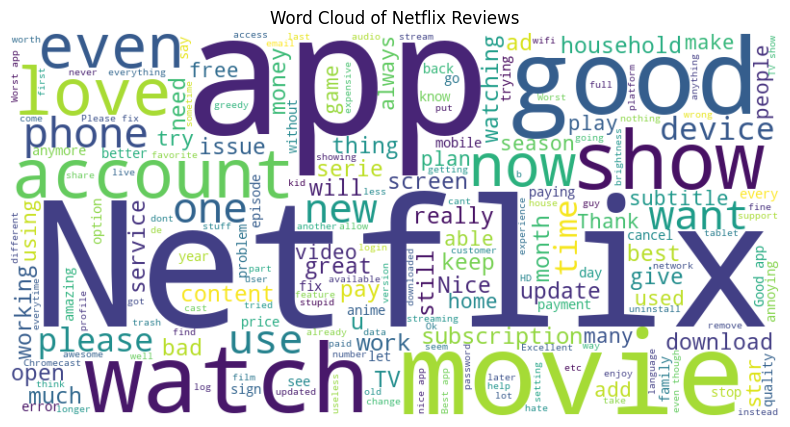

In [6]:
df_c['content'] = df_c['content'].astype(str)

text = " ".join(review for review in df_c['content'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Netflix Reviews")
plt.show()

### Sentiment Analysis using TextBlob

In [7]:
df_c['sentiment'] = df_c['content'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [8]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

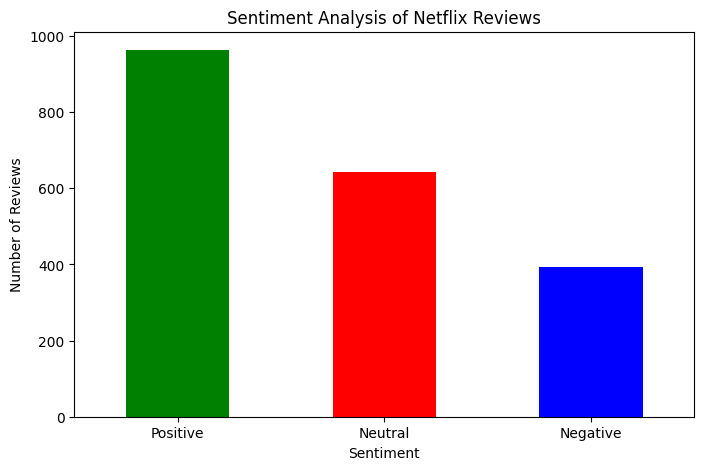

In [9]:
df_c['sentiment_category'] = df_c['sentiment'].apply(categorize_sentiment)


sentiment_counts = df_c['sentiment_category'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Analysis of Netflix Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

### Plotting Monthly Review Count against month-year

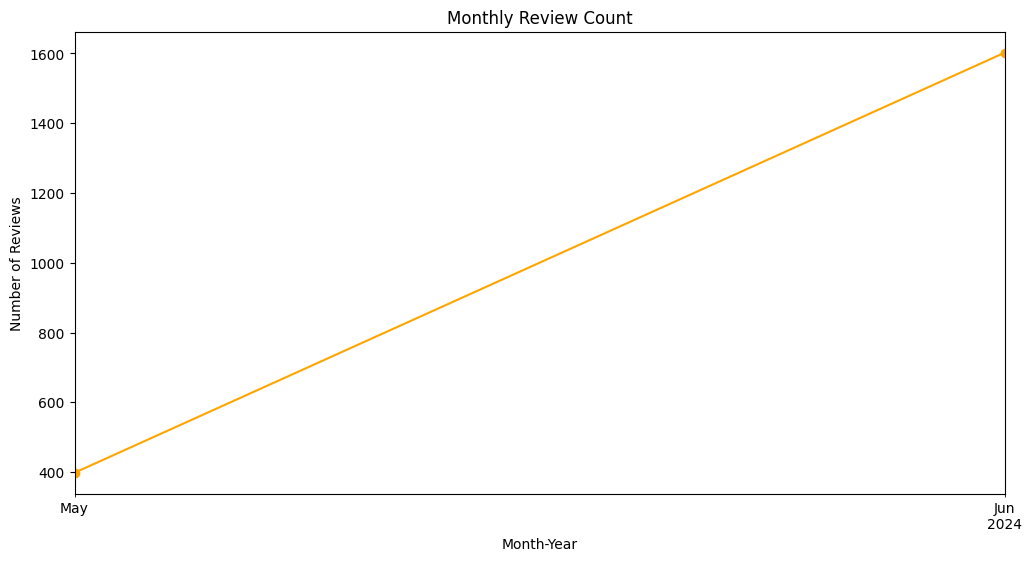

In [10]:
df_c['at'] = pd.to_datetime(df_c['at'])

df_c['month_year'] = df_c['at'].dt.to_period('M')

monthly_review_count = df_c['month_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_review_count.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Review Count')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

## 3. Cleaning the Text Document with Two Approaches

### Approach 1: Basic Text Cleaning with Regex

In [11]:
def basic_cleaning(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'[^\w\s]', '', text) ## Remove Punctuation
    text = re.sub(r'\d+', '', text) ## Remove Numbers
    text = text.lower() ## Lower Case
    return text

df_c['cleaned_text_basic'] = df_c['content'].apply(basic_cleaning)

In [12]:
print(df_c[['content', 'cleaned_text_basic']].head())

                                             content  \
0  Netfix Canada forced my wife into a screen tha...   
1  I use this app until it asks if I'm still ther...   
2                        Boycott Netflix from Bharat   
3  Little good movies and a lot of wonderful TV s...   
4  New to this but, so far smooth sailing.app is ...   

                                  cleaned_text_basic  
0  netfix canada forced my wife into a screen tha...  
1  i use this app until it asks if im still there...  
2                        boycott netflix from bharat  
3  little good movies and a lot of wonderful tv s...  
4  new to this but so far smooth sailingapp is ea...  


### Approach 2: Advanced Text Cleaning with SpaCy

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def hf_cleaning(text):
    tokens = tokenizer.tokenize(text)
    cleaned_tokens = [token.lower() for token in tokens if token.isalnum()]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

df_c['cleaned_content_hf'] = df_c['content'].apply(hf_cleaning)

df_c[['content', 'cleaned_content_hf']].head()


,content,cleaned_content_hf
0,Netfix Canada forced my wife into a screen tha...,net canada forced my wife into a screen that w...
1,I use this app until it asks if I'm still ther...,i use this app until it asks if i m still ther...
2,Boycott Netflix from Bharat,boycott netflix from b
3,Little good movies and a lot of wonderful TV s...,little good movies and a lot of wonderful tv s...
4,"New to this but, so far smooth sailing.app is ...",new to this but so far smooth sailing app is e...


## 4. Implementation of Three Word Embedding Methods

### Method 1: SpaCy Embeddings

In [14]:
def spacy_embeddings(text):
    doc = nlp(text)
    return doc.vector

df_c['spacy_embeddings'] = df_c['cleaned_content_hf'].apply(spacy_embeddings)

# Display the DataFrame with the new column
print(df_c[['cleaned_content_hf', 'spacy_embeddings']].head())

                                  cleaned_content_hf  \
0  net canada forced my wife into a screen that w...   
1  i use this app until it asks if i m still ther...   
2                             boycott netflix from b   
3  little good movies and a lot of wonderful tv s...   
4  new to this but so far smooth sailing app is e...   

                                    spacy_embeddings  
0  [-0.03781646, -0.12095436, -0.16828209, 0.1374...  
1  [0.19731252, -0.15988463, -0.10442508, 0.02653...  
2  [0.28433096, -0.38060677, 0.020737886, 0.33274...  
3  [0.37297282, -0.14397502, -0.12159743, 0.49763...  
4  [0.23241882, -0.19028482, -0.23494594, 0.11531...  


### Method 2: FastText Embeddings

In [15]:
def fasttext_embeddings(text):
    words = word_tokenize(text)
    vectors = [fasttext_model.get_word_vector(word) for word in words if word in fasttext_model.words]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return None

In [16]:
import fasttext
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

fasttext_model = fasttext.train_unsupervised('netflix_reviews.csv', model='skipgram', dim=100)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Read 4M words
Number of words:  20651
Number of labels: 0
Progress: 100.0% words/sec/thread:    3111 lr:  0.000000 avg.loss:  2.115361 ETA:   0h 0m 0s 40.3% words/sec/thread:    2743 lr:  0.029849 avg.loss:  2.112092 ETA:   0h 0m49s lr:  0.020281 avg.loss:  2.121653 ETA:   0h 0m31s ETA:   0h 0m15s


In [17]:
df_c['fasttext_embeddings'] = df_c['cleaned_content_hf'].apply(fasttext_embeddings)

In [18]:
print(df_c[['cleaned_content_hf', 'fasttext_embeddings']].head())

                                  cleaned_content_hf  \
0  net canada forced my wife into a screen that w...   
1  i use this app until it asks if i m still ther...   
2                             boycott netflix from b   
3  little good movies and a lot of wonderful tv s...   
4  new to this but so far smooth sailing app is e...   

                                 fasttext_embeddings  
0  [-0.13773485, 0.04678612, 0.1894113, 0.1004917...  
1  [0.025933102, 0.015352481, 0.08361111, 0.01981...  
2  [0.053702004, 0.12909767, 0.2276552, -0.044265...  
3  [0.09820912, -0.06341823, 0.36154515, -0.03683...  
4  [0.089953706, -0.01220986, 0.15025508, -0.0340...  


### Method 3: BERT Embeddings using Hugging Face Transformers

In [19]:
import torch
from transformers import BertTokenizer, BertModel

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Define the BERT embeddings function
def bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()

# Apply the BERT embeddings function to the cleaned_content_hf column
df_c['bert_embeddings'] = df_c['cleaned_content_hf'].apply(bert_embeddings)

# Display the DataFrame with the new column
print(df_c[['cleaned_content_hf', 'bert_embeddings']].head())

                                  cleaned_content_hf  \
0  net canada forced my wife into a screen that w...   
1  i use this app until it asks if i m still ther...   
2                             boycott netflix from b   
3  little good movies and a lot of wonderful tv s...   
4  new to this but so far smooth sailing app is e...   

                                     bert_embeddings  
0  [0.08184979, 0.097193934, 0.54258823, -0.14610...  
1  [0.29972306, 0.049314138, 0.5540318, 0.0301266...  
2  [0.5429871, -0.3341964, 0.013554419, 0.0287249...  
3  [0.3527264, 0.1268925, 0.134729, 0.2829578, 0....  
4  [0.009056443, -0.11426062, 0.64951324, 0.09522...  


## 5. Comparison of the Results of Word Embedding Methods

#### SpaCy Embeddings:
SpaCy embeddings generate dense vector representations of words, encompassing both semantic meanings and grammatical structures.

##### Strengths:
Fast inference time due to pre-trained models.
Useful for tasks requiring quick and lightweight embeddings.
Captures syntactic dependencies well.

##### Weaknesses:
Limited in capturing deep contextual information compared to transformer-based models.
Performance may not be as high for tasks requiring nuanced understanding of context.

#### BERT Embeddings:
BERT embeddings provide deep contextualized representations by considering the entire sentence, making them highly effective for various NLP tasks.

##### Strengths:
State-of-the-art performance on many NLP benchmarks.
Captures complex contextual relationships and nuances in the text.
Suitable for tasks requiring deep understanding of context and semantics.

##### Weaknesses:
Computationally expensive and slower inference time compared to traditional embeddings.
Requires significant computational resources for efficient processing.

#### FastText Embeddings:
FastText embeddings provide subword-level representations.
It facilitates handling words that are not in the vocabulary and obtaining morphological information.

##### Strengths:
Effective in handling rare and misspelled words due to subword information.
Fast training and inference time.
Performs well in multilingual settings and low-resource languages.

##### Weaknesses:
Limited in capturing deep contextual information compared to transformer-based models.
May not perform as well as BERT in tasks requiring understanding of complex context.

# Conclusion

In conclusion, each embedding method has its strengths and weaknesses. SpaCy embeddings are fast and lightweight, making them suitable for quick tasks with less emphasis on deep context. BERT embeddings offer state-of-the-art performance by capturing deep contextual information, but they are computationally expensive. FastText embeddings strike a balance by providing robust subword-level representations, particularly useful for handling rare words and multilingual settings. The choice of embedding method depends on the specific requirements of the task, computational resources, and the importance of capturing context in the given application.